# Подключение модуля (import)

In [101]:
import math
import random
import numpy as np
import matplotlib.pyplot as plot
from array import array
from mpl_toolkits.mplot3d import Axes3D

# Построение орбит небесных тел средствами

In [156]:
class point:
    def __init__(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z

class body:
    def __init__(self, location, mass, velocity, name = ""):
        self.location = location
        self.mass = mass
        self.velocity = velocity
        self.name = name

def calculate_single_body_acceleration(bodies, body_index):
    G_const = 6.67408e-11
    acceleration = point(0,0,0)
    target_body = bodies[body_index]
    for index, external_body in enumerate(bodies):
        if index != body_index:
            r = (target_body.location.x - external_body.location.x)**2 + (target_body.location.y - external_body.location.y)**2 + (target_body.location.z - external_body.location.z)**2
            r = math.sqrt(r)
            
            if r <= 0:
                r = 1
            
            tmp = G_const * external_body.mass / r**3
            acceleration.x += tmp * (external_body.location.x - target_body.location.x)
            acceleration.y += tmp * (external_body.location.y - target_body.location.y)
            acceleration.z += tmp * (external_body.location.z - target_body.location.z)

    return acceleration

def compute_velocity(bodies, time_step = 1):
    for body_index, target_body in enumerate(bodies):
        acceleration = calculate_single_body_acceleration(bodies, body_index)

        target_body.velocity.x += acceleration.x * time_step
        target_body.velocity.y += acceleration.y * time_step
        target_body.velocity.z += acceleration.z * time_step 


def update_location(bodies, time_step = 1):
    for target_body in bodies:
        target_body.location.x += target_body.velocity.x * time_step
        target_body.location.y += target_body.velocity.y * time_step
        target_body.location.z += target_body.velocity.z * time_step

def compute_gravity_step(bodies, time_step = 1):
    compute_velocity(bodies, time_step = time_step)
    update_location(bodies, time_step = time_step)

def plot_output(bodies, outfile = None):
    fig = plot.figure()
    colours = ['r','b','g','y','m','c']
    ax = fig.add_subplot(1,1,1, projection='3d')
    max_range = 0
    for current_body in bodies: 
        max_dim = max(max(current_body["x"]),max(current_body["y"]),max(current_body["z"]))
        if max_dim > max_range:
            max_range = max_dim
        ax.plot(current_body["x"], current_body["y"], current_body["z"], c = random.choice(colours), label = current_body["name"])        
    
    ax.set_xlim([-max_range,max_range])    
    ax.set_ylim([-max_range,max_range])
    ax.set_zlim([-max_range,max_range])
    ax.legend()        

    if outfile:
        plot.savefig(outfile)
    else:
        plot.show()

def run_simulation(bodies, names = None, time_step = 1, number_of_steps = 10000, report_freq = 100):

    #create output container for each body
    body_locations_hist = []
    for current_body in bodies:
        body_locations_hist.append({"x":[], "y":[], "z":[], "name":current_body.name})
        
    for i in range(1,number_of_steps):
        compute_gravity_step(bodies, time_step = 1000)            
        
        if i % report_freq == 0:
            for index, body_location in enumerate(body_locations_hist):
                body_location["x"].append(bodies[index].location.x)
                body_location["y"].append(bodies[index].location.y)           
                body_location["z"].append(bodies[index].location.z)       

    return body_locations_hist


R1=1.496*10**8
R2=3.844*10**5

T1=3.156*10**7
T2=2.36*10**6

def X(t):
    return R1*np.cos(2*np.pi*t/T1)

def Y(t):
    return R1*np.sin(2*np.pi*t/T1)

def x(t):
    return R2*np.cos(2*np.pi*t/T2)

def y(t):
    return R2*np.sin(2*np.pi*t/T2)

##  Данных планета

In [83]:
sun = {"location":point(0,0,0), "mass":2e30, "velocity":point(0,0,0)}
mercury = {"location":point(0,5.7e10,0), "mass":3.285e23, "velocity":point(47000,0,0)}
venus = {"location":point(0,1.1e11,0), "mass":4.8e24, "velocity":point(35000,0,0)}
earth = {"location":point(0,1.5e11,0), "mass":6e24, "velocity":point(30000,0,0)}
mars = {"location":point(0,2.2e11,0), "mass":2.4e24, "velocity":point(24000,0,0)}
jupiter = {"location":point(0,7.7e11,0), "mass":1e28, "velocity":point(13000,0,0)}
saturn = {"location":point(0,1.4e12,0), "mass":5.7e26, "velocity":point(9000,0,0)}
uranus = {"location":point(0,2.8e12,0), "mass":8.7e25, "velocity":point(6835,0,0)}
neptune = {"location":point(0,4.5e12,0), "mass":1e26, "velocity":point(5477,0,0)}
pluto = {"location":point(0,3.7e12,0), "mass":1.3e22, "velocity":point(4748,0,0)}

## Параметр

In [180]:
N=1000.0

t=[T1*i/N for i in np.arange(0,N,1)]

Xi = np.array([X(w) for w in t])
Yi = np.array([Y(w) for w in t])
xi = np.array([x(w) for w in t])
yi = np.array([y(w) for w in t])

XG=Xi+xi
YG=Yi+yi

## Траектория орбит Земли и Луны

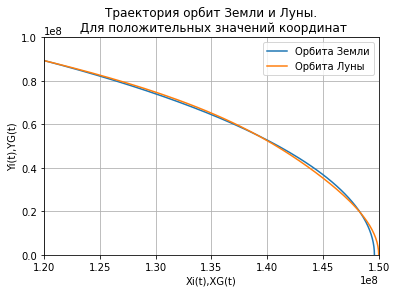

In [185]:
plot.figure()
plot.title("Траектория орбит Земли и Луны.\n Для положительных значений координат")
plot.xlabel('Xi(t),XG(t)')
plot.ylabel('Yi(t),YG(t)')
plot.axis([1.2*10**8,1.5*10**8,0,1*10**8])
plot.plot(Xi,Yi,label='Орбита Земли')
plot.plot(XG,YG,label='Орбита Луны')
plot.legend(loc='best')
plot.grid(True)
plot.show()

## Определение орбит Земли и Луны

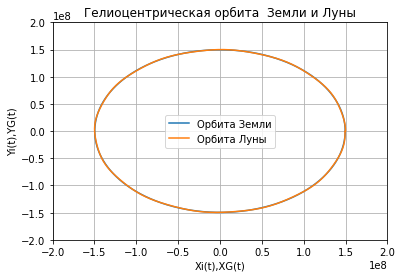

In [186]:
plot.figure()
plot.title("Гелиоцентрическая орбита  Земли и Луны")
plot.xlabel('Xi(t),XG(t)')
plot.ylabel('Yi(t),YG(t)')
plot.axis([-2.0*10**8,2.0*10**8,-2.0*10**8,2.0*10**8])
plot.plot(Xi,Yi,label='Орбита Земли')
plot.plot(XG,YG,label='Орбита Луны')
plot.legend(loc='best')
plot.grid(True)
plot.show()

## 3d Определение орбит панета

<Figure size 864x504 with 0 Axes>

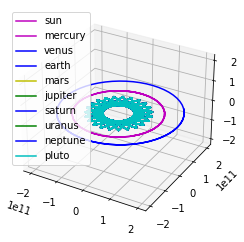

In [82]:
bodies = [
    body( location = sun["location"], mass = sun["mass"], velocity = sun["velocity"], name = "sun"),
    body( location = earth["location"], mass = earth["mass"], velocity = earth["velocity"], name = "mercury"),
    body( location = mars["location"], mass = mars["mass"], velocity = mars["velocity"], name = "venus"),
    body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "earth"),
    body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "mars"),
    body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "jupiter"),
    body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "saturn"),
    body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "uranus"),
    body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "neptune"),
    body( location = venus["location"], mass = venus["mass"], velocity = venus["velocity"], name = "pluto"),
    ]

plot_output(run_simulation(bodies, time_step = 100, number_of_steps = 80000, report_freq = 1000))